# League of Legends - Predicting the outcome of a game

__The goal of this project is to try to predict which team will win the match, according to the performance during the first 10 minutes of the game.__

### What is league of legends?

League of Legends is a team-based strategy game where two teams of five powerful champions face off to destroy the other’s base. Choose from over 140 champions to make epic plays, secure kills, and take down towers as you battle your way to victory.

So, we have 10 players (5 red team players vs 5 blue team players) facing each other in a map, called "the rift". The fianl goal of the teams is to destroy the opponents' base, after having taken down a series of towers and objectives. Each player controls a champion, which can become stronger in two ways: gaining experience (and thus achieving higher levels) or hoarding gold (in order to buy powerful items). Defeating enemies and conquering objectives (towers, minions, epic and jungles monsters) are the most important ways to gain both experience and gold. 
<br>
<br>
One game usually lasts about 30-40 minutes, but it is possible to surrender after 15 minutes of gameplay, if the situation is really though. 
<br>
<br>
__Is it possible to predict the outcome of a game after just 10 minutes, using the dataset that we have?__
<br>
<br>
_NB: the competitive scene of League of Legends is very vivid and it has a lifetime of about 10 years. It is therefore necessary to split players in different layers of ability: the ranks (iron, bronze, silver, gold, platinum, diamond, and so on). It is very important to highlight that players usually play with people that have a similar rank, and that players of different ranks have incredibly different performances. For instance, iron players usually make many more deaths and kills than diamond players. Thus, it is necessary to use different models for different ranks: we will only consider diamond players in our dataset!_

### Importing and initialization

In [1]:
# Import data analysis libraries
import pandas as pd
import numpy as np

# Import libraries for visualisation
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Show all columns
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

In [2]:
df = pd.read_csv('../Data/high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


### Let's explore our dataset

In [3]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

There are come useless columns! 
- RedGoldDiff and redExperiencDiff are the opposite of the same variables for the blue team
- All of the information about red kills and redDeaths is contained in the same blue variables
- The statistics per minute are not important, since we have a fixed time and the final data
- RedFirstBlood can be understood from blueFirstBlood
- We absolutely do not need the gameId
<br>

Let's talk about the other columns:
- Blue/red wards placed or destroyed is the discrete amount of vision items placed or destroyed (very wide range and high sdev)
- BlueFirstBlood is a boolean: 1 if the blue team got the first kill, 0 otherwise (it is about 50%, nice)
- BlueKills, blueDeaths, blueAssists contain all of the information about the pvp performance of the game (all in similar ranges)
- BlueEliteMonster is the sum of blueDragons and blueHeralds. There would be a third epic monster, but his spawn is long after the 10 minutes interval that we consider
- Blue/red Towers Destroyed is the number of opponents' towers destroyed by each team
- Blue/red Total Gold and Total Experience are the amount of gold and experience earned after 10 minutes of gameplay by each team
- Blue/red Average Level is the level (from 1 to 18) reached by the players of each team. It is realted to blue/red Total Experience (the experience to reach new levels is not linear)
- Blue/red minions killed: we have the total and also a column for the jungle ones (neutral, thougher and particular minions)
- Two columns for the difference of gold/exp between the team

<br>

It is important to notice that the features have very different ranges, so we might need to standardise the dataset.
<BR>

__One last thing: let's separate the classification column from the others: blueWins is our target!__

In [4]:
drop_cols = ['redFirstBlood','redKills','redDeaths'
             ,'redGoldDiff','redExperienceDiff', 'blueCSPerMin',
            'blueGoldPerMin','redCSPerMin','redGoldPerMin', 'gameId','blueWins']
y = df.blueWins
df.drop(drop_cols, axis=1, inplace=True)
df.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,15,6,8,0,0,0,0,16567,6.8,17047,197,55
1,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,12,1,2,2,1,1,1,17620,6.8,17438,240,52
2,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,15,3,14,0,0,0,0,17285,6.8,17254,203,28
3,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,15,2,10,0,0,0,0,16478,7.0,17961,235,47
4,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,17,2,7,1,1,0,0,17404,7.0,18313,225,67


In [5]:
df.describe()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,22.367952,2.723150,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088
std,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,18.457427,2.138356,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000
25%,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,14.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000
50%,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,16.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000
75%,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,20.000000,4.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000
max,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,276.000000,24.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWardsPlaced               9879 non-null   int64  
 1   blueWardsDestroyed            9879 non-null   int64  
 2   blueFirstBlood                9879 non-null   int64  
 3   blueKills                     9879 non-null   int64  
 4   blueDeaths                    9879 non-null   int64  
 5   blueAssists                   9879 non-null   int64  
 6   blueEliteMonsters             9879 non-null   int64  
 7   blueDragons                   9879 non-null   int64  
 8   blueHeralds                   9879 non-null   int64  
 9   blueTowersDestroyed           9879 non-null   int64  
 10  blueTotalGold                 9879 non-null   int64  
 11  blueAvgLevel                  9879 non-null   float64
 12  blueTotalExperience           9879 non-null   int64  
 13  blu

#### Is the dataset balanced? Number of blue/red wins

Red Wins: 4949 (50.096%), Blue Wins: 4930(49.904%)


C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


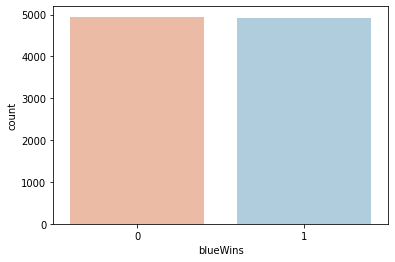

In [7]:
# Visualise blueWins using countplot
ax = sns.countplot(y, label='Count', palette='RdBu')
R,B = y.value_counts()
print('Red Wins: {} ({}%), Blue Wins: {}({}%)'.format(R,round(100*R/(R+B),3),B,round(100*B/(R+B),3)))

#### Let's make some violin plots

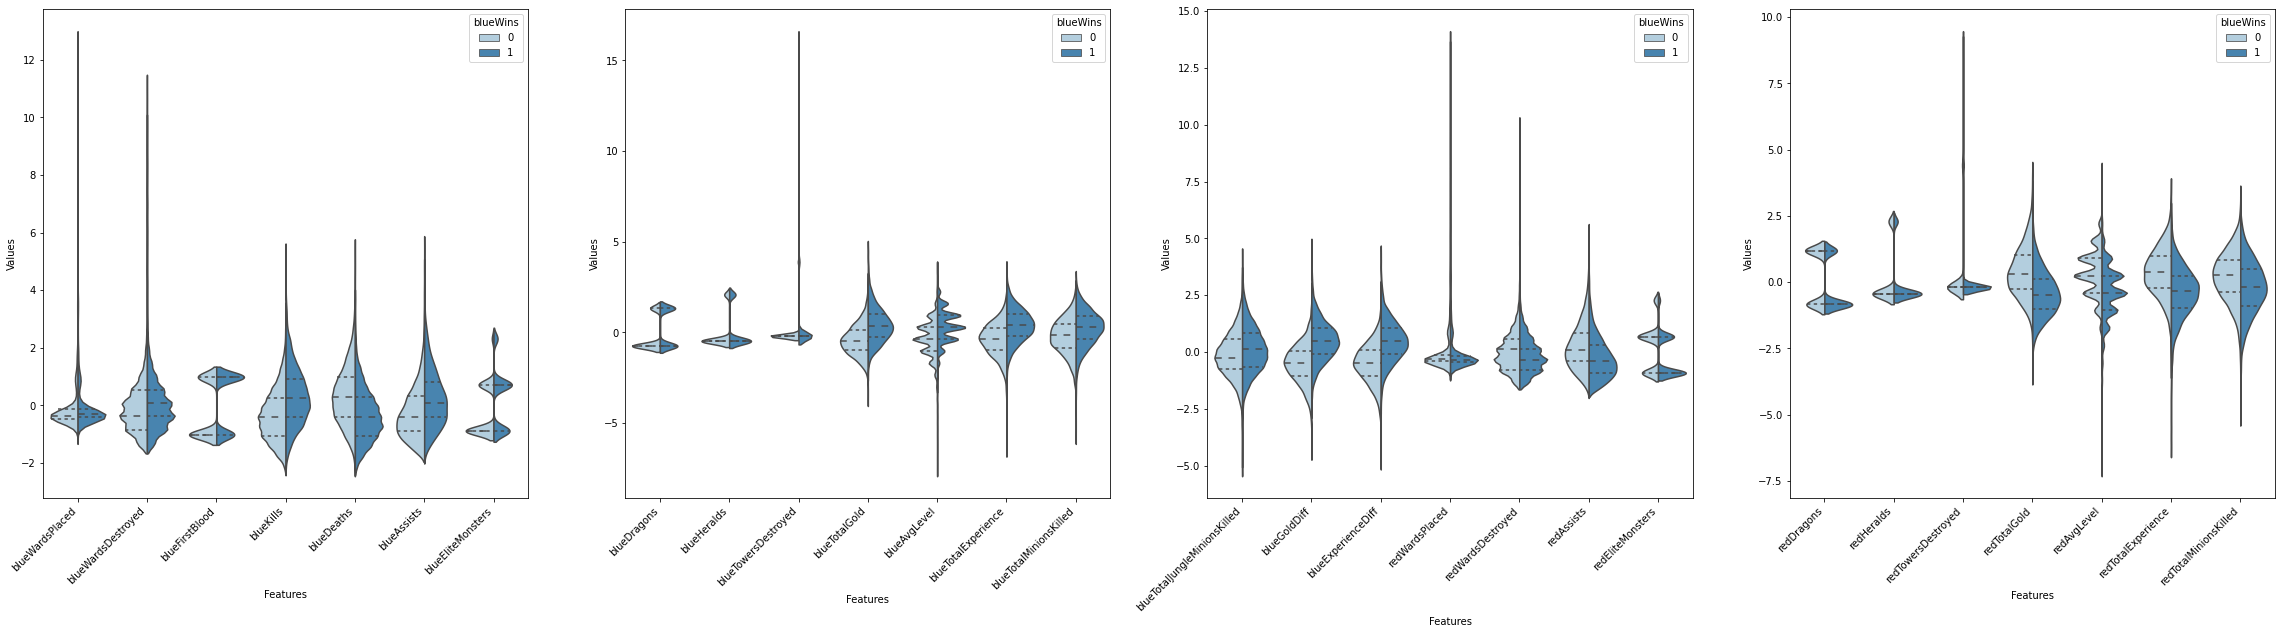

In [8]:
fig, ax = plt.subplots(1,4,figsize=(40,10))

data = df #copy data to keep origianl safe
data_std = (data - data.mean()) / data.std() #let's standardise our data
data = pd.concat([y, data_std.iloc[:, 0:7]], axis=1) #let's focus on the first 7 columns only
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')
# Create violin plot of features
sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, split=True,
               inner='quart', ax=ax[0], palette='Blues')
fig.autofmt_xdate(rotation=45)

#repeat for next 7 columns
data = df
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 7:14]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')
sns.violinplot(x='Features', y='Values', hue='blueWins', 
               data=data, split=True, inner='quart', ax=ax[1], palette='Blues')
fig.autofmt_xdate(rotation=45)

#repeat for next 7 columns
data = df
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 14:21]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')
sns.violinplot(x='Features', y='Values', hue='blueWins', 
               data=data, split=True, inner='quart', ax=ax[2], palette='Blues')
fig.autofmt_xdate(rotation=45)

#repeat for next 7 columns
data = df
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 21:28]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')
sns.violinplot(x='Features', y='Values', hue='blueWins', 
               data=data, split=True, inner='quart', ax=ax[3], palette='Blues')
fig.autofmt_xdate(rotation=45)

plt.show()

- Blue kills appears to have a large positive impact on winning the game.
- Blue deaths has a large negative impact on winning the game.
- Gold and experience differences have major influence.
- Minions and Jungle minions do not seem to have much impact.
- First blood is positively correlated with outcome but also mirrors blue kills. --> drop it!

In [9]:
drop_cols = ['blueFirstBlood']
df.drop(drop_cols, axis=1, inplace=True)

### It might be a good idea to check for correlations between our features

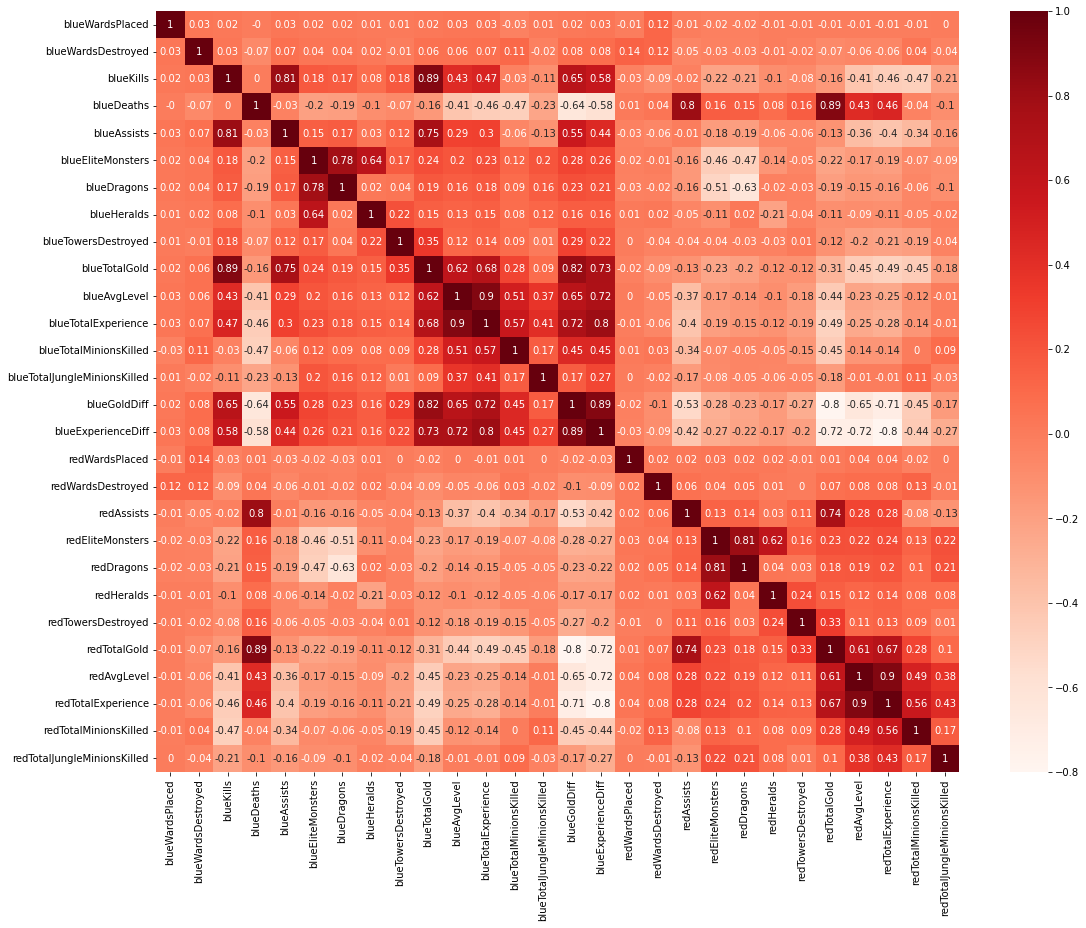

In [10]:
plt.figure(figsize=(18,14))
sns.heatmap(round(df.corr(),2), cmap='Reds', annot=True)
plt.show()

We definetely have some correlated features that are worth exploring much more.
Right now, we can say that the average level is not a necessary feature, since its information is completely included in the total experience of the teams.

In [11]:
drop_cols = ['redAvgLevel','blueAvgLevel']
df.drop(drop_cols, axis=1, inplace=True)

### Let's focus on kills, deaths and assists

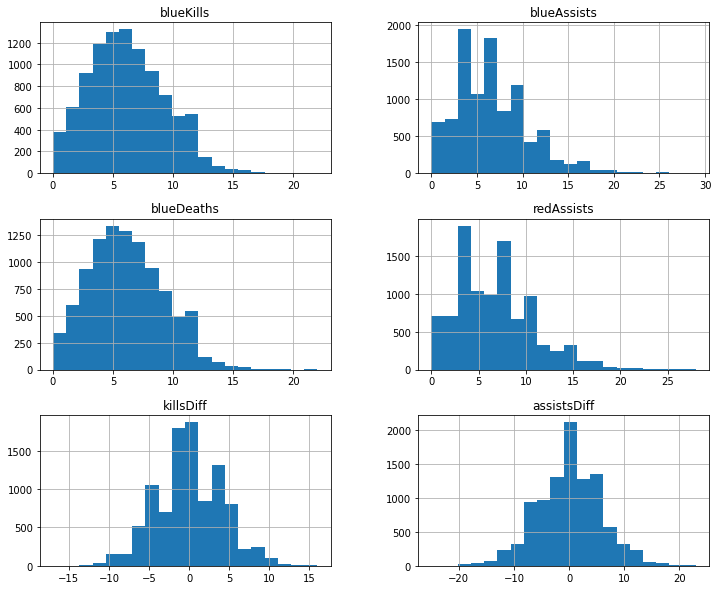

In [12]:
df['killsDiff'] = df['blueKills'] - df['blueDeaths']
df['assistsDiff'] = df['blueAssists'] - df['redAssists']

df[['blueKills','blueAssists','blueDeaths','redAssists','killsDiff','assistsDiff']].hist(figsize=(12,10), bins=20)
plt.show()


It is interesting to note that assists, of course, scale with kills (blue assists with blue kills, red assists with blue deaths). Everything is as expected.

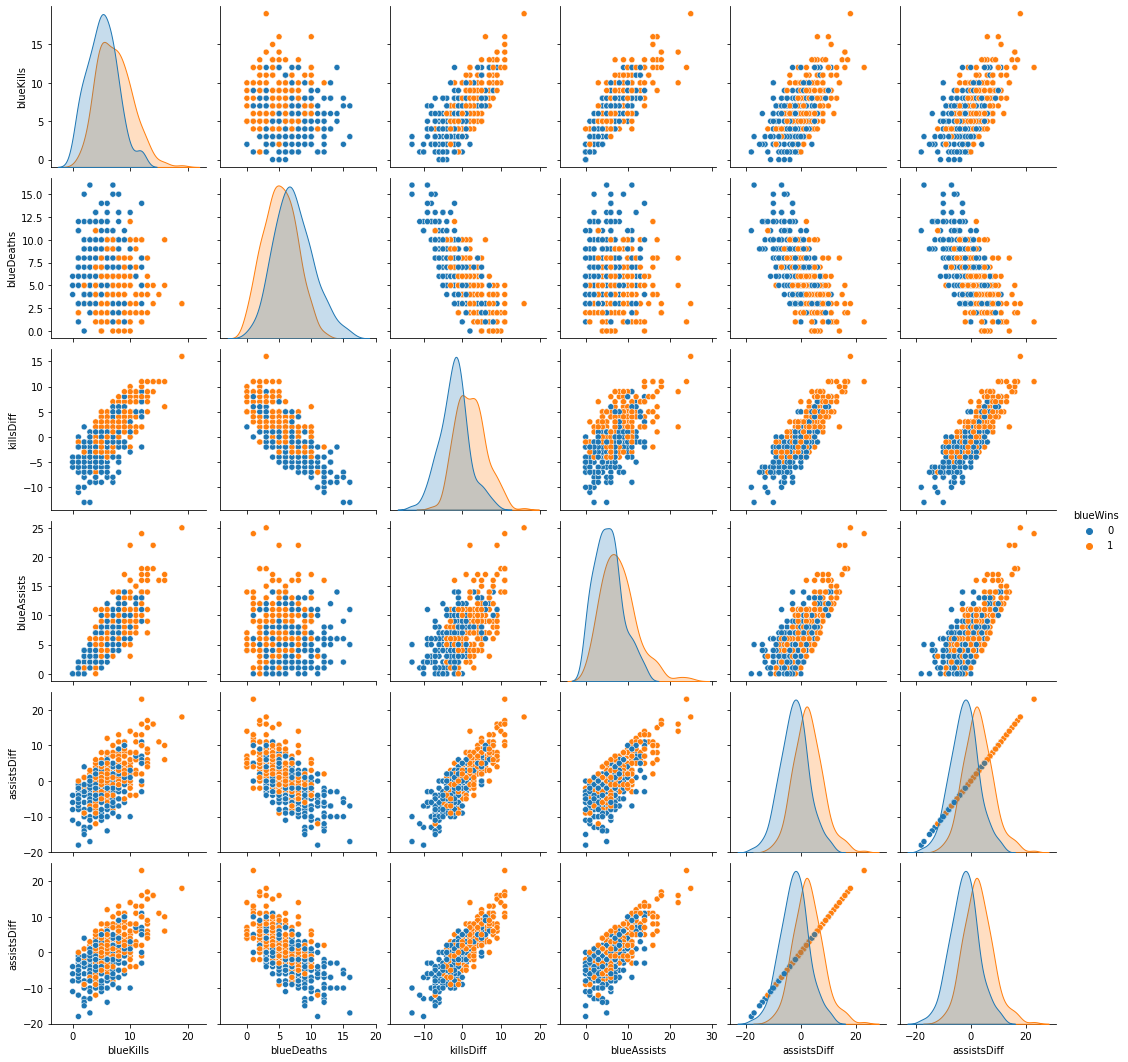

In [13]:
data = pd.concat([y, df], axis=1).sample(500)
sns.pairplot(data, vars=['blueKills','blueDeaths','killsDiff','blueAssists','assistsDiff','assistsDiff'], hue='blueWins')
plt.show()

We can consider only the differential values of kills and assists.

In [14]:
drop_cols = ['blueKills','blueDeaths','blueAssists','redAssists']
df.drop(drop_cols, axis=1, inplace=True)

### Let's focus on elite monsters!
Including the three features wouldn't be very good, since one is the sum of the other two. But what should we keep in the model?

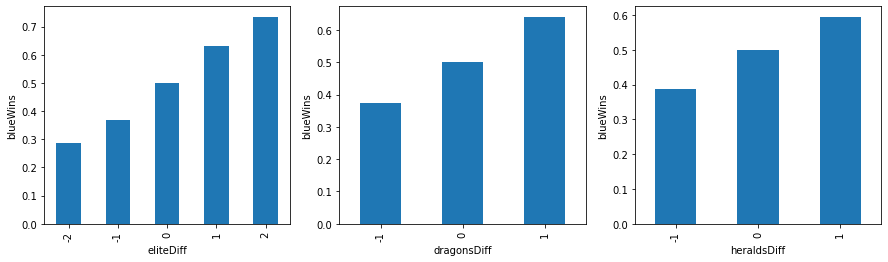

In [15]:
#create differential features
df['dragonsDiff'] = df['blueDragons'] - df['redDragons']
df['heraldsDiff'] = df['blueHeralds'] - df['redHeralds']
df['eliteDiff'] = df['blueEliteMonsters'] - df['redEliteMonsters']

data = pd.concat([y, df], axis=1)

#groupby important data and get the average blueWins
eliteGroup = data.groupby(['eliteDiff'])['blueWins'].mean()
dragonGroup = data.groupby(['dragonsDiff'])['blueWins'].mean()
heraldGroup = data.groupby(['heraldsDiff'])['blueWins'].mean()

#create graph
fig, ax = plt.subplots(1,3, figsize=(15,4))
eliteGroup.plot(kind='bar', ax=ax[0])
dragonGroup.plot(kind='bar', ax=ax[1])
heraldGroup.plot(kind='bar', ax=ax[2])
for i in range(0,3):
    ax[i].set_ylabel('blueWins')
plt.show()

So, it seems that killing a dragon as much more impact on the outcome on the game than killing the herald, which still has its importance. Therefore, we should consider the two measures instead of their sum!

In [16]:
drop_cols = ['blueEliteMonsters','blueDragons','blueHeralds',
            'redEliteMonsters','redDragons','redHeralds']
df.drop(drop_cols, axis=1, inplace=True)

### And what about towers?

Text(0, 0.5, 'Count')

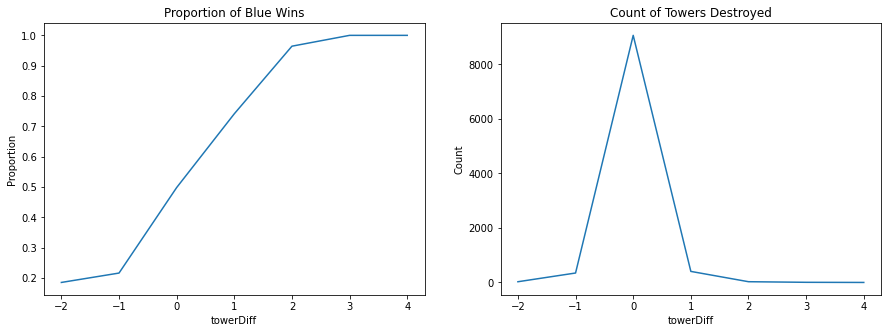

In [17]:
df['towerDiff'] = df['blueTowersDestroyed'] - df['redTowersDestroyed']

data = pd.concat([y, df], axis=1)

towerGroup = data.groupby(['towerDiff'])['blueWins']

fig, ax = plt.subplots(1,2,figsize=(15,5))

towerGroup.mean().plot(kind='line', ax=ax[0])
ax[0].set_title('Proportion of Blue Wins')
ax[0].set_ylabel('Proportion')

towerGroup.count().plot(kind='line', ax=ax[1])
ax[1].set_title('Count of Towers Destroyed')
ax[1].set_ylabel('Count')

During the first 10 minutes, it is unlikely that diamond players destroy towers. However, when this happens, it has a major impact on the game! Let's keep the difference in our model.
<br>
_Being able to destroy two towers results in an almost 100% probability to win a game!!!_

In [18]:
drop_cols = ['blueTowersDestroyed','redTowersDestroyed']
df.drop(drop_cols, axis=1, inplace=True)

### Some format operations on gold and experience
Let's just keep one difference for gold and one for experience!

In [19]:
drop_cols = ['blueTotalGold','blueTotalExperience','redTotalGold','redTotalExperience']
df.drop(drop_cols, axis=1, inplace=True)
df.rename(columns={'blueGoldDiff':'goldDiff', 'blueExperienceDiff':'expDiff'}, inplace=True)

### Let's check also minions

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


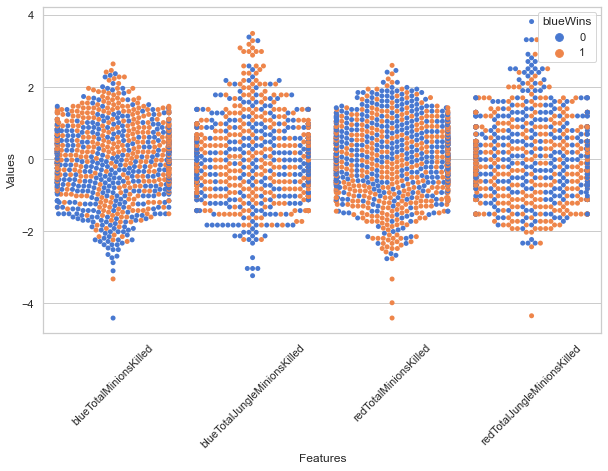

In [20]:
sns.set(style='whitegrid', palette='muted')

data = df[['blueTotalMinionsKilled','blueTotalJungleMinionsKilled',
      'redTotalMinionsKilled','redTotalJungleMinionsKilled']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10,6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

Minions and jungle minions do not seem to have an impact on the outcome of the game. How is this possible?
<br>
We have to keep in mind that we are considering high-level players only (diamonds), which have a very good knowledge of the game.
<br>
Such players usually take all of the possible minions, regardless of other things such as experience, kills, gold.
<br>
__Therefore, the numbers of minions killed can be ignored from now on.__
<br>
_It would be interesting to check if the minion features would have an impact on the outcome of lower-level games (and we would expect it to do so!)_

In [21]:
drop_cols = ['blueTotalMinionsKilled','blueTotalJungleMinionsKilled',
      'redTotalMinionsKilled','redTotalJungleMinionsKilled']
df.drop(drop_cols, axis=1, inplace=True)

### Let's check the last feature: wards!

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


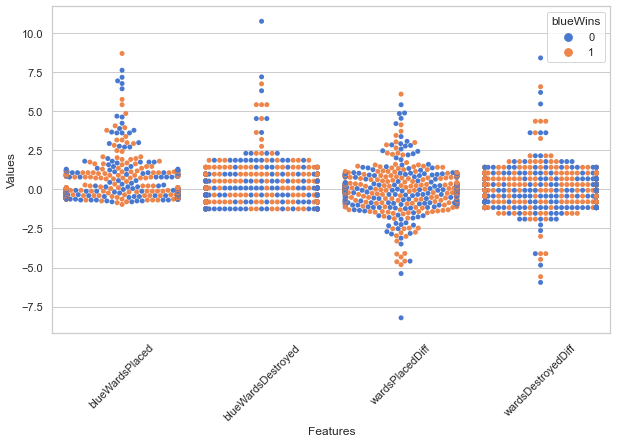

In [22]:
sns.set(style='whitegrid', palette='muted')

df['wardsPlacedDiff'] = df['blueWardsPlaced'] - df['redWardsPlaced']
df['wardsDestroyedDiff'] = df['blueWardsDestroyed'] - df['redWardsDestroyed']

data = df[['blueWardsPlaced','blueWardsDestroyed','wardsPlacedDiff','wardsDestroyedDiff']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10,6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

Also this time, it is possible to notice that placing/destroying wards is a standard skill that all of diamond players mastered very well.
<br>
__Therefore, we do not expect this data to have an impact on the outcome of the game (while it might do so in low-levels game)__

In [23]:
drop_cols = ['blueWardsPlaced','blueWardsDestroyed','wardsPlacedDiff',
            'wardsDestroyedDiff','redWardsPlaced','redWardsDestroyed']
df.drop(drop_cols, axis=1, inplace=True)

### It is time to predict!
Let's give one last look at our polished dataset

In [24]:
df.columns

Index(['goldDiff', 'expDiff', 'killsDiff', 'assistsDiff', 'dragonsDiff',
       'heraldsDiff', 'eliteDiff', 'towerDiff'],
      dtype='object')

In [25]:
df.head()

,goldDiff,expDiff,killsDiff,assistsDiff,dragonsDiff,heraldsDiff,eliteDiff,towerDiff
0,643,-8,3,3,0,0,0,0
1,-2908,-1173,0,3,-1,-1,-2,-1
2,-1172,-1033,-4,-10,1,0,1,0
3,-1321,-7,-1,-5,0,1,1,0
4,-1004,230,0,-1,-1,0,-1,0


#### Import useful libraries and prepare data for models

In [26]:
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

X = preprocessing.StandardScaler().fit(df).transform(df.astype(float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Starting set:', df.shape,y.shape)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Starting set: (9879, 8) (9879,)
Train set: (7903, 8) (7903,)
Test set: (1976, 8) (1976,)


#### Create the output table

In [27]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Algorithm', 'Accuracy', 'Recall', 'Precision', 'F-Score']

def get_confusion_matrix(algorithm, y_pred):
    # Create confusion matrix and interpret values
    con = confusion_matrix(y_test, y_pred)
    tn, fn, tp, fp = con[0][0], con[1][0], con[1][1], con[0][1]
    algorithm = algorithm
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f_score = (2 * precision * recall) / (recall + precision)
    return algorithm, accuracy, recall, precision, f_score

#### KNN

In [28]:
# Test different values of k
Ks = 10
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    kneigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred = kneigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)

# Use most accurate k value to predict test values
k = mean_acc.argmax()+1
neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
y_pred = neigh.predict(X_test)

# Call confusion matrix and accuracy
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('KNN', y_pred)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5), round(precision,5), round(f_score,5)])

#### Decision Tree

In [29]:
# Initialise Decision Tree classifier and predict
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,y_train)
y_pred = drugTree.predict(X_test)

# Call confusion matrix and accuracy
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('Decision', y_pred)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),  round(precision,5), round(f_score,5)])

#### Logistic Regression

In [30]:
# Train and predict logistic regression model
LR = LogisticRegression(C=0.01, solver='liblinear')
y_pred = LR.fit(X_train,y_train).predict(X_test)

# Call confusion matrix and accuracy
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('LR', y_pred)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5), round(precision,5), round(f_score,5)])

#### Support Vector Machines

In [31]:
clf = svm.SVC(kernel='rbf')
y_pred = clf.fit(X_train, y_train).predict(X_test)

# Call confusion matrix and accuracy
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('SVM', y_pred)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5), round(precision,5), round(f_score,5)])

#### Naive Bayes

In [32]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# Call confusion matrix and accuracy
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('Bayes', y_pred)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5), round(precision,5), round(f_score,5)])

#### Random forest

In [33]:
# Instantiate Random Forest Classifier and predict values
clf = RandomForestClassifier(max_depth=2, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)

# Call confusion matrix and accuracy
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('R Forest', y_pred)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5), round(precision,5), round(f_score,5)])

### Let's evaluate the results!

In [34]:
print(table)

+-----------+----------+---------+-----------+---------+
| Algorithm | Accuracy |  Recall | Precision | F-Score |
+-----------+----------+---------+-----------+---------+
|    KNN    | 0.70698  | 0.68851 |  0.71668  | 0.70231 |
|  Decision | 0.73077  | 0.69153 |  0.75219  | 0.72059 |
|     LR    | 0.74646  | 0.74899 |  0.74673  | 0.74786 |
|    SVM    | 0.73988  | 0.73286 |  0.74488  | 0.73882 |
|   Bayes   | 0.73229  | 0.73286 |   0.7336  | 0.73323 |
|  R Forest | 0.73785  | 0.73085 |  0.74283  | 0.73679 |
+-----------+----------+---------+-----------+---------+


- The most accurate model is the logistic regression: after 10 minutes, we are able to tell if we will win/lose the game with an accuracy of about 75%, not bad!
- Of course, it is possible to improve the accuracy of the model. There is an incredible amount of features that we may consider, such as individual player stats (if a player has a very big lead, he may easily carry the game), or features regarding the items bought by the players.
- It could be also useful to experiment more with the features of the starting dataset: maybe consider the absolute values of kills, instead of the differential ones and stuff like that
- False positives: we think that we will win, but we end up losing. Not a big problem, we will still play the game and maybe waste 30 minutes more.
- False negatives: we think that we will lose, while we might win. We may choose to surrender after 15 minutes and waste a potential win, so this could be an issue.
- Since we are just trying to predict the outcome of a game, it is crystal clear that accuracy it the main driver and that neiher false positives and negatives are a big deal. 